In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\mydata\G8Vitamin\data\final\LOCMM_06062025_Baseline1.csv")

In [3]:
df.describe()

,SEQN,Gender,Age,Race,familysize,PIR,BMI,Hba1c,milk_consumption,SmokeFam,VitaminD
count,62374.000000,62374.000000,62374.000000,62374.000000,62374.000000,5.716000e+04,61153.000000,58609.000000,6.237300e+04,5.168000e+04,57274.000000
mean,56242.071857,1.511880,41.724773,2.965210,3.482958,2.421292e+00,27.858024,5.616158,1.994693e+00,1.762829e+00,61.118327
std,26975.890678,0.499863,21.525121,1.206259,1.731201,1.614582e+00,7.014009,0.991346,1.093107e+00,1.333201e+01,25.828595
min,9966.000000,1.000000,12.000000,1.000000,1.000000,5.397605e-79,12.610000,2.000000,5.397605e-79,5.397605e-79,5.410000
25%,32894.000000,1.000000,21.000000,2.000000,2.000000,1.040000e+00,22.890000,5.100000,1.000000e+00,1.000000e+00,42.700000
50%,55739.500000,2.000000,40.000000,3.000000,3.000000,1.990000e+00,26.800000,5.400000,2.000000e+00,2.000000e+00,58.600000
75%,80183.750000,2.000000,60.000000,4.000000,5.000000,3.850000e+00,31.500000,5.700000,3.000000e+00,2.000000e+00,75.300000
max,102956.000000,2.000000,85.000000,5.000000,7.000000,5.000000e+00,130.210000,18.800000,9.000000e+00,9.990000e+02,422.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62374 entries, 0 to 62373
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEQN              62374 non-null  float64
 1   Gender            62374 non-null  float64
 2   Age               62374 non-null  float64
 3   Race              62374 non-null  float64
 4   familysize        62374 non-null  float64
 5   PIR               57160 non-null  float64
 6   BMI               61153 non-null  float64
 7   Hba1c             58609 non-null  float64
 8   milk_consumption  62373 non-null  float64
 9   SmokeFam          51680 non-null  float64
 10  VitaminD          57274 non-null  float64
 11  YearID            62374 non-null  object 
dtypes: float64(11), object(1)
memory usage: 5.7+ MB


## Data processing

In [5]:
# Tách năm bắt đầu thành cột số nguyên để dễ xử lý
df['YearStart'] = df['YearID'].str[:4].astype(int)

# Xử lý cho dữ liệu từ 2001–2012
df1 = df[df['YearStart'] < 2013].copy()
df1.loc[df1['SmokeFam'] == 2, 'SmokeFam'] = 1
df1 = df1[df1['SmokeFam'] <= 1]

# Xử lý cho dữ liệu từ 2013 trở đi
df2 = df[df['YearStart'] >= 2013].copy()
df2.loc[(df2['SmokeFam'] >= 1.0) & (df2['SmokeFam'] <= 3.0), 'SmokeFam'] = 1
df2 = df2[df2['SmokeFam'] <= 1]
df = pd.concat([df1,df2])


In [6]:
#concat the valid 
df = pd.concat([df1,df2])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51655 entries, 0 to 62373
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEQN              51655 non-null  float64
 1   Gender            51655 non-null  float64
 2   Age               51655 non-null  float64
 3   Race              51655 non-null  float64
 4   familysize        51655 non-null  float64
 5   PIR               48035 non-null  float64
 6   BMI               50576 non-null  float64
 7   Hba1c             48503 non-null  float64
 8   milk_consumption  51655 non-null  float64
 9   SmokeFam          51655 non-null  float64
 10  VitaminD          47223 non-null  float64
 11  YearID            51655 non-null  object 
 12  YearStart         51655 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 5.5+ MB


In [8]:
#diebete assign:
def isDiabete(row):
    if row<6.5:
        return 0
    else:
        return 1

In [9]:
df['Hba1c'] = df['Hba1c'].apply(isDiabete)

In [10]:
df.describe()

,SEQN,Gender,Age,Race,familysize,PIR,BMI,Hba1c,milk_consumption,SmokeFam,VitaminD,YearStart
count,51655.000000,51655.000000,51655.000000,51655.000000,51655.000000,4.803500e+04,50576.000000,51655.000000,5.165500e+04,5.165500e+04,47223.000000,51655.000000
mean,50820.679566,1.509205,41.398780,2.950963,3.477534,2.397747e+00,27.756529,0.140664,2.017017e+00,8.810377e-01,60.348808,2007.809138
std,26123.716198,0.499920,21.575871,1.183160,1.729297,1.608560e+00,6.971984,0.347678,1.091756e+00,3.237473e-01,25.346483,5.011740
min,9966.000000,1.000000,12.000000,1.000000,1.000000,5.397605e-79,12.610000,0.000000,5.397605e-79,5.397605e-79,5.410000,2001.000000
25%,29154.500000,1.000000,20.000000,2.000000,2.000000,1.030000e+00,22.800000,0.000000,1.000000e+00,1.000000e+00,42.200000,2003.000000
50%,48338.000000,2.000000,39.000000,3.000000,3.000000,1.960000e+00,26.730000,0.000000,2.000000e+00,1.000000e+00,58.100000,2007.000000
75%,67222.500000,2.000000,60.000000,4.000000,5.000000,3.790000e+00,31.370000,0.000000,3.000000e+00,1.000000e+00,74.500000,2011.000000
max,102956.000000,2.000000,85.000000,5.000000,7.000000,5.000000e+00,130.210000,1.000000,9.000000e+00,1.000000e+00,422.000000,2017.000000


In [11]:
df.dropna(inplace=True)

In [12]:
def labelVitaminD(row):
    if row<50:
        return 1
    else:
        return 0
    

In [13]:
df['label'] = df['VitaminD'].apply(labelVitaminD)

In [14]:
df['label'].value_counts()

label
0    27525
1    15881
Name: count, dtype: int64

In [15]:
df.drop(columns=['SEQN','VitaminD','YearStart','YearID'],inplace=True)

In [16]:
df = df[df['milk_consumption']<=3]

## Statistic

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming `df` is your original dataframe
X = df.drop(columns=["label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# Combine features and label for export
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_test, y_test], axis=1)

df = pd.concat([train_df,val_df])

# === Bước 3: Tách dữ liệu theo mốc năm 2013 ===
df_final_train = df[df['YearStart'] <= 2013]
df_final_test = df[df['YearStart'] > 2013]

# === Bước 4: Ghi ra file CSV ===
df_final_train.to_csv(r'c:\mydata\G8Vitamin\data\final\baselinestore\processed_train.csv', index=False)
df_final_test.to_csv(r'c:\mydata\G8Vitamin\data\final\baselinestore\processed_test.csv', index=False)

# === Log số dòng để xác nhận ===
print(f"✅ Số dòng train: {len(df_final_train)} được lưu vào train.csv")
print(f"✅ Số dòng test : {len(df_final_test)} được lưu vào test.csv")


✅ Số dòng train: 36637 được lưu vào train.csv
✅ Số dòng test : 6769 được lưu vào test.csv


### 1.Gender

In [84]:
X_train['Gender'].value_counts()

Gender
2.0    15351
1.0    14907
Name: count, dtype: int64

In [85]:
X_test['Gender'].value_counts()

Gender
2.0    6596
1.0    6373
Name: count, dtype: int64

### Age, Race,H_xize, HPIR, BMI


--- BMI (Train Set) ---
Median: 26.79
Q1 (25th percentile): 22.86
Q3 (75th percentile): 31.4
IQR (Q3 - Q1): 8.54


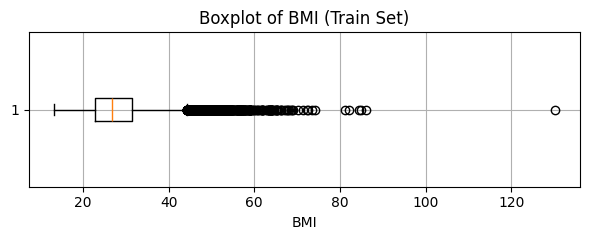


--- BMI (Test Set) ---
Median: 26.79
Q1 (25th percentile): 22.9
Q3 (75th percentile): 31.47
IQR (Q3 - Q1): 8.57


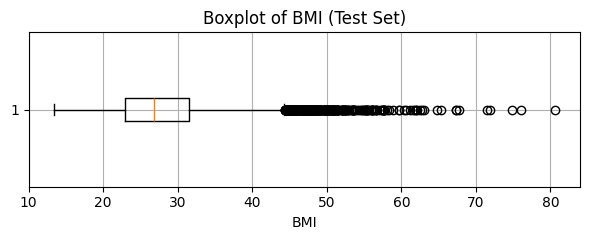


--- Age (Train Set) ---
Median: 39.0
Q1 (25th percentile): 20.0
Q3 (75th percentile): 59.0
IQR (Q3 - Q1): 39.0


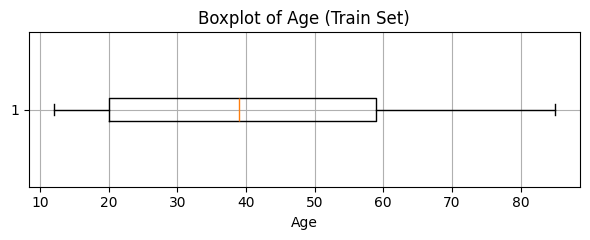


--- Age (Test Set) ---
Median: 40.0
Q1 (25th percentile): 21.0
Q3 (75th percentile): 60.0
IQR (Q3 - Q1): 39.0


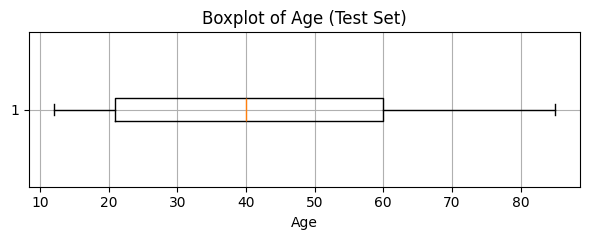


--- familysize (Train Set) ---
Median: 3.0
Q1 (25th percentile): 2.0
Q3 (75th percentile): 5.0
IQR (Q3 - Q1): 3.0


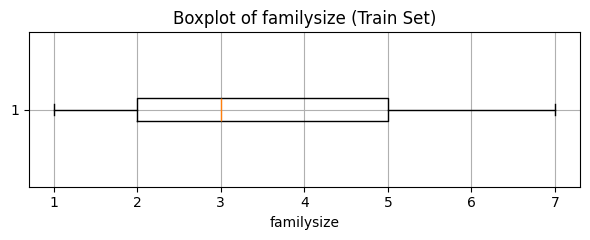


--- familysize (Test Set) ---
Median: 3.0
Q1 (25th percentile): 2.0
Q3 (75th percentile): 5.0
IQR (Q3 - Q1): 3.0


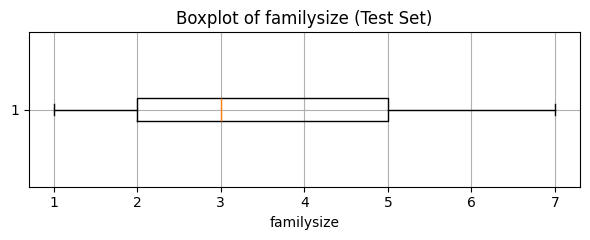


--- PIR (Train Set) ---
Median: 1.98
Q1 (25th percentile): 1.04
Q3 (75th percentile): 3.85
IQR (Q3 - Q1): 2.81


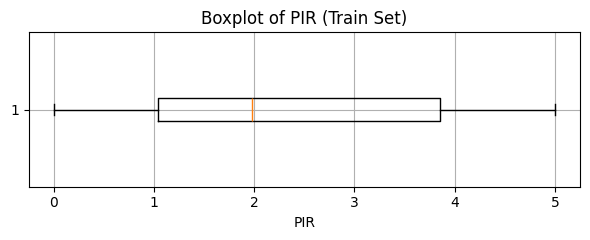


--- PIR (Test Set) ---
Median: 2.0
Q1 (25th percentile): 1.04
Q3 (75th percentile): 3.85
IQR (Q3 - Q1): 2.81


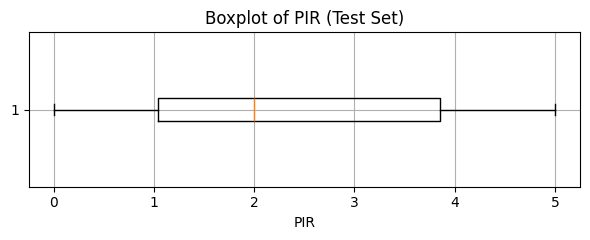

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace with your actual list of numeric columns
numeric_columns = ["BMI", "Age", "familysize", "PIR"]
dflist = [X_train, X_test]
dfnames = ["Train", "Test"]

# Iterate through each column
for col in numeric_columns:
    for df, name in zip(dflist, dfnames):
        data = df[col].dropna()

        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        mean_val = data.median()

        print(f"\n--- {col} ({name} Set) ---")
        print(f"Median: {mean_val}")
        print(f"Q1 (25th percentile): {Q1}")
        print(f"Q3 (75th percentile): {Q3}")
        print(f"IQR (Q3 - Q1): {IQR}")

        # Boxplot
        plt.figure(figsize=(6, 2.5))
        plt.boxplot(data, vert=False)
        plt.title(f'Boxplot of {col} ({name} Set)')
        plt.xlabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [87]:
# Replace with your actual list of categorical columns
categorical_columns = ["Gender", "Race", "milk_consumption", "Hba1c", "SmokeFam","familysize"]
dflist = [X_train, X_test]
dfnames = ["Train", "Test"]

for col in categorical_columns:
    for df, name in zip(dflist, dfnames):
        print(f"\n--- {col} ({name} Set) ---")
        counts = df[col].value_counts(dropna=False)
        percentages = df[col].value_counts(normalize=True, dropna=False) * 100
        result = pd.DataFrame({
            'Count': counts,
            'Percentage (%)': percentages.round(2)
        })
        print(result)



--- Gender (Train Set) ---
        Count  Percentage (%)
Gender                       
2.0     15351           50.73
1.0     14907           49.27

--- Gender (Test Set) ---
        Count  Percentage (%)
Gender                       
2.0      6596           50.86
1.0      6373           49.14

--- Race (Train Set) ---
      Count  Percentage (%)
Race                       
3.0   12922           42.71
4.0    6944           22.95
1.0    5800           19.17
5.0    2427            8.02
2.0    2165            7.16

--- Race (Test Set) ---
      Count  Percentage (%)
Race                       
3.0    5666           43.69
4.0    2904           22.39
1.0    2380           18.35
5.0    1096            8.45
2.0     923            7.12

--- milk_consumption (Train Set) ---
                  Count  Percentage (%)
milk_consumption                       
3.000000e+00      13524           44.70
2.000000e+00       8055           26.62
1.000000e+00       4392           14.52
5.397605e-79       4287 

# Models

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score,
    brier_score_loss
)

# === 1. Load Data ===
# df = pd.read_csv("your_file.csv")  # <-- Replace with your actual filename

# === 2. Features and Label ===
X = df.drop(columns=["label"])
y = df["label"].values

# === 3. Define categorical and numerical features ===
categorical_features = ["Gender", "Race", "milk_consumption", "Hba1c", "SmokeFam"]
numerical_features = [col for col in X.columns if col not in categorical_features]

# === 4. Preprocessing ===
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
])

# === 5. Models ===
models = {
    "GBM": GradientBoostingClassifier(),
    "LR": LogisticRegression(max_iter=1000),
    "Nnet": MLPClassifier(max_iter=1000),
    "RF": RandomForestClassifier(),
    # "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# === 6. Evaluation Function ===
def evaluate_model(name, model, X, y):
    sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    metrics = {
        "AUC": [], "ACC": [], "PPV": [], "NPV": [], "SEN": [],
        "SPE": [], "F1 score": [], "MCC": [], "KAPPA": [], "Brier score": []
    }

    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])

    for train_idx, test_idx in sss.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1]

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        metrics["AUC"].append(roc_auc_score(y_test, y_proba))
        metrics["ACC"].append(accuracy_score(y_test, y_pred))
        metrics["PPV"].append(precision_score(y_test, y_pred, zero_division=0))
        metrics["NPV"].append(tn / (tn + fn) if (tn + fn) > 0 else 0)
        metrics["SEN"].append(recall_score(y_test, y_pred))  # Sensitivity
        metrics["SPE"].append(tn / (tn + fp) if (tn + fp) > 0 else 0)  # Specificity
        metrics["F1 score"].append(f1_score(y_test, y_pred))
        metrics["MCC"].append(matthews_corrcoef(y_test, y_pred))
        metrics["KAPPA"].append(cohen_kappa_score(y_test, y_pred))
        metrics["Brier score"].append(brier_score_loss(y_test, y_proba))

    return {metric: np.mean(values) for metric, values in metrics.items()}

# === 7. Run All Models ===
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(name, model, X, y)

# === 8. Export Results ===
results_df = pd.DataFrame(results).T
results_df.index.name = "Method"
results_df.to_csv("evaluation_results.csv")
print(results_df)


Evaluating GBM...
Evaluating LR...
Evaluating Nnet...
Evaluating RF...
Evaluating XGBoost...


c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:16:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:16:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:16:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:16:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

              AUC       ACC       PPV       NPV       SEN       SPE  F1 score  \
Method                                                                          
GBM      0.773113  0.727088  0.665187  0.751258  0.510671  0.851829  0.577760   
LR       0.761869  0.722114  0.651907  0.750649  0.515057  0.841461  0.575447   
Nnet     0.767314  0.724127  0.656908  0.751119  0.514024  0.845229  0.576660   
RF       0.747825  0.711713  0.631572  0.745091  0.507782  0.829257  0.562936   
XGBoost  0.759019  0.718883  0.641213  0.752111  0.525011  0.830631  0.577283   

              MCC     KAPPA  Brier score  
Method                                    
GBM      0.388535  0.381254     0.182075  
LR       0.378837  0.373106     0.185805  
Nnet     0.382853  0.376574     0.184758  
RF       0.356299  0.351632     0.193035  
XGBoost  0.374004  0.369830     0.188692  


In [18]:
from sklearn.model_selection import StratifiedKFold
# === 2. Features and Label ===
X = df.drop(columns=["label"])
y = df["label"].values

# === 3. Define categorical and numerical features ===
categorical_features = ["Gender", "Race", "milk_consumption", "Hba1c", "SmokeFam"]
numerical_features = [col for col in X.columns if col not in categorical_features]

# === 4. Preprocessing ===
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
])

# === 5. Models ===
models = {
    "GBM": GradientBoostingClassifier(),
    "LR": LogisticRegression(max_iter=1000),
    "Nnet": MLPClassifier(max_iter=1000),
    "RF": RandomForestClassifier(),
    # "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}
def evaluate_model_kfold(name, model, X, y, n_splits=10):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {
        "AUC": [], "ACC": [],
        "Precision_0": [], "Precision_1": [], "Precision_macro": [],
        "Recall_0": [], "Recall_1": [], "Recall_macro": [],
        "F1_0": [], "F1_1": [], "F1_macro": [],
        "NPV": [], "SEN": [], "SPE": [],
        "MCC": [], "KAPPA": [], "Brier score": []
    }

    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1]

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        metrics["AUC"].append(roc_auc_score(y_test, y_proba))
        metrics["ACC"].append(accuracy_score(y_test, y_pred))
        metrics["Precision_0"].append(precision_score(y_test, y_pred, pos_label=0, zero_division=0))
        metrics["Precision_1"].append(precision_score(y_test, y_pred, pos_label=1, zero_division=0))
        metrics["Precision_macro"].append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        metrics["Recall_0"].append(recall_score(y_test, y_pred, pos_label=0, zero_division=0))
        metrics["Recall_1"].append(recall_score(y_test, y_pred, pos_label=1, zero_division=0))
        metrics["Recall_macro"].append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        metrics["F1_0"].append(f1_score(y_test, y_pred, pos_label=0, zero_division=0))
        metrics["F1_1"].append(f1_score(y_test, y_pred, pos_label=1, zero_division=0))
        metrics["F1_macro"].append(f1_score(y_test, y_pred, average='macro', zero_division=0))
        metrics["NPV"].append(tn / (tn + fn) if (tn + fn) > 0 else 0)
        metrics["SEN"].append(recall_score(y_test, y_pred, pos_label=1))
        metrics["SPE"].append(tn / (tn + fp) if (tn + fp) > 0 else 0)
        metrics["MCC"].append(matthews_corrcoef(y_test, y_pred))
        metrics["KAPPA"].append(cohen_kappa_score(y_test, y_pred))
        metrics["Brier score"].append(brier_score_loss(y_test, y_proba))

    return {metric: np.mean(values) for metric, values in metrics.items()}

results = {}
for name, model in models.items():
    print(f"Evaluating {name} with k-fold CV...")
    results[name] = evaluate_model_kfold(name, model, X, y, n_splits=10)

results_df = pd.DataFrame(results).T
results_df.index.name = "Method"
results_df.to_csv("evaluation_results_kfold.csv")
print(results_df)

Evaluating GBM with k-fold CV...
Evaluating LR with k-fold CV...
Evaluating Nnet with k-fold CV...
Evaluating RF with k-fold CV...
Evaluating XGBoost with k-fold CV...


c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:28:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:28:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:28:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:28:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

              AUC       ACC  Precision_0  Precision_1  Precision_macro  \
Method                                                                   
GBM      0.774750  0.728295     0.752569     0.666765         0.709667   
LR       0.763703  0.722327     0.751544     0.651424         0.701484   
Nnet     0.771366  0.726491     0.758176     0.653407         0.705791   
RF       0.747848  0.709927     0.745188     0.627078         0.686133   
XGBoost  0.763041  0.721424     0.753166     0.646520         0.699843   

         Recall_0  Recall_1  Recall_macro      F1_0      F1_1  F1_macro  \
Method                                                                    
GBM      0.851762  0.514078      0.682920  0.799074  0.580435  0.689755   
LR       0.840019  0.518127      0.679073  0.793292  0.577047  0.685169   
Nnet     0.835461  0.537427      0.686444  0.794871  0.589475  0.692173   
RF       0.824776  0.510661      0.667719  0.782937  0.562805  0.672871   
XGBoost  0.834330  0.525529    